In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
(x1, y1), (x2, y2) = mnist.load_data()

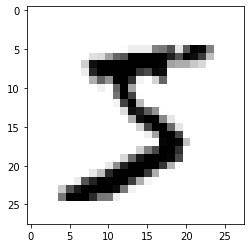

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x1[0], cmap = plt.cm.binary)
plt.show()

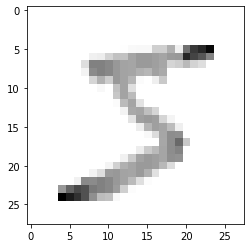

In [4]:
x1 = tf.keras.utils.normalize(x1, axis = 1)
x2 = tf.keras.utils.normalize(x2, axis = 1)
plt.imshow(x1[0], cmap = plt.cm.binary)

In [5]:
import numpy as np
ims = 28
x1 = np.array(x1).reshape(-1, ims, ims, 1)
x2 = np.array(x2).reshape(-1, ims, ims, 1)
x1.shape

(60000, 28, 28, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()
model.add(Conv2D(64, (2,2), input_shape = x1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), input_shape = x1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), input_shape = x1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), input_shape = x1.shape[1:]))
model.add(Activation("relu"))

2022-06-15 23:30:15.218715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 23:30:15.264775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 23:30:15.264976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 23:30:15.265741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 activation (Activation)     (None, 27, 27, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(x1,y1, epochs=10, validation_split=0.4)

Epoch 1/10


2022-06-15 23:30:17.060257: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1125/1125 [==============================] - 7s 4ms/step - loss: 0.4051 - accuracy: 0.8705 - val_loss: 0.1610 - val_accuracy: 0.9512
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.1212 - accuracy: 0.9622 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.0868 - accuracy: 0.9729 - val_loss: 0.0908 - val_accuracy: 0.9720
Epoch 4/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0891 - val_accuracy: 0.9734
Epoch 5/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 6/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 7/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0679 - val_accuracy: 0.9807
Epo

In [12]:
tl, ta = model.evaluate(x2, y2)
print(tl, ta)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9770
0.08365922421216965 0.9769999980926514
